In [201]:
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
%matplotlib inline

In [202]:
import warnings
warnings.filterwarnings('ignore')

In [203]:
df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,20.0,1821.4500,864.615794,800.0,1173.75,1480.5,2633.00,3700.0
bedrooms,20.0,2.9000,0.967906,1.0,2.00,3.0,3.25,5.0
price,20.0,78.8535,43.761901,32.0,41.50,61.0,106.50,167.0


In [205]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = df.drop(columns='price')
Y = df['price']

X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.values.reshape(df.shape[0],1))

In [206]:
X_scaled[:3] , Y_scaled[:3]

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222]]))

In [207]:
X[:3] , Y[:3]

(   area  bedrooms
 0  1056         2
 1  2600         4
 2  1440         3,
 0     39.07
 1    120.00
 2     62.00
 Name: price, dtype: float64)

In [208]:
np.ones(2).shape , X_scaled.T.shape

((2,), (2, 20))

In [209]:
X_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [210]:
scaler.inverse_transform(X_scaled.T)

array([[ 43.91724138, 115.79310345,  61.79310345,  65.5637931 ,
         50.62068966,  49.22413793, 121.93793103, 148.37931034,
         55.74137931, 167.        ,  78.55172414, 124.40517241,
         41.31034483,  45.96551724,  99.5       ,  49.45689655,
         49.68965517,  66.44827586, 123.70689655,  32.        ],
       [ 65.75      , 133.25      ,  99.5       ,  99.5       ,
         65.75      ,  65.75      , 133.25      , 133.25      ,
         99.5       , 167.        ,  99.5       , 133.25      ,
         65.75      ,  65.75      ,  99.5       ,  65.75      ,
         99.5       ,  99.5       ,  99.5       ,  32.        ]])

In [211]:
np.ones(2)

array([1., 1.])

In [212]:
X.shape[1]
np.ones(2)
np.dot(np.ones(2),X_scaled.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [213]:
X.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
area,1056,2600,1440,1521,1200,1170,2732,3300,1310,3700,1800,2785,1000,1100,2250,1175,1180,1540,2770,800
bedrooms,2,4,3,3,2,2,4,4,3,5,3,4,2,2,3,2,3,3,3,1


## Batch GD

In [67]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    n = X.shape[0]
    
    #just for vis
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        y_pred = np.dot(w, X_scaled.T) + b
        
        #loss function here is a MSE
        w_grad = -(2/n) * (X.T.dot(y_true - y_pred))
        b_grad = -(2/n) * np.sum(y_true - y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    
    return w,b,cost, cost_list,epochs_list
        
    
w,b,cost, cost_list,epochs_list = batch_gradient_descent(X_scaled, Y_scaled.reshape(Y_scaled.shape[0],), epochs=1000)

[0.66469087 0.60541671] -0.17792104056392882 0.0048654808183488454


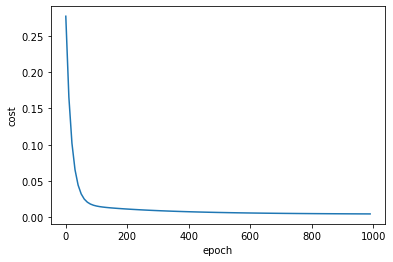

(Text(0.5, 17.200000000000003, 'epoch'),
 Text(17.200000000000003, 0.5, 'cost'),
 None)

In [68]:
print(w,b,cost)
plt.xlabel('epoch') , plt.ylabel('cost') ,plt.plot(epochs_list,cost_list) , plt.show()

In [69]:
w,b

(array([0.66469087, 0.60541671]), -0.17792104056392882)

In [124]:
scaler = MinMaxScaler().fit(X)
s = scaler.transform([[2600, 4]])[0]
print(s)
scaler.inverse_transform([s])

[0.62068966 0.75      ]


array([[2600.,    4.]])

In [133]:
# def predict(area,bedrooms,w,b):
#     scaled_x = scaler.transform([[area, bedrooms]])[0]
#     scaled_y = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
#     return scaler.inverse_transform([[scaled_y]])

# predict(2600,4,w,b)

## Stochastic GD

In [134]:
import random

In [149]:
X.sample(3)

,area,bedrooms
2,1440,3
13,1100,2
16,1180,3


In [161]:
random_index = random.randint(0,len(X))
print(random_index)
# X[random_index]
X.sample(random_index)

1


,area,bedrooms
18,2770,3


In [185]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_feature = X.shape[1]
    w = np.ones(shape=number_of_feature)
    b = 0
    n = X.shape[0]
    
    #just for vis
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        #Randomly picked sample
        random_index = random.randint(0,number_of_feature-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_pred = np.dot(w, sample_x.T) + b
        #loss function here is a MSE
        w_grad = -(2/n) * (sample_x.T.dot(sample_y - y_pred))
        b_grad = -(2/n) * np.sum(sample_y - y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y - y_pred))
        
        if i%100==0:
            cost_list.append(cost)
            epochs_list.append(i)
    
    return w,b,cost, cost_list,epochs_list

    
w_sgd,b_sgd,cost_sgd, cost_list_sgd,epochs_list_sgd = stochastic_gradient_descent(X_scaled, Y_scaled.reshape(Y_scaled.shape[0]), epochs=10000)

[0.68510274 0.66550944] -0.23198605556369284 0.0016491274874497663


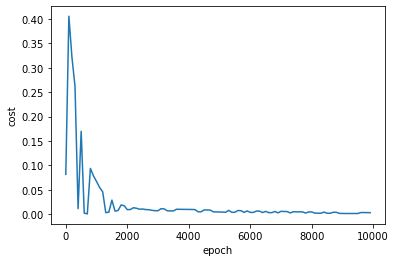

(Text(0.5, 17.200000000000003, 'epoch'),
 Text(17.200000000000003, 0.5, 'cost'),
 None)

In [186]:
print(w_sgd,b_sgd,cost_sgd)
plt.xlabel('epoch') , plt.ylabel('cost') ,plt.plot(epochs_list_sgd,cost_list_sgd) , plt.show()